In [8]:
import scipy
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import model_selection

sns.set(style="white", color_codes=True)
%matplotlib inline

In [9]:
# Problem:  Predict the flower class based on available attributes.
# Solution:  There are way too many Python based library's out there to solve this problem.  
# My take away is search google first and see what would be the best library for this problem.

In [10]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Download and read csv file.
df = pd.read_csv(data_url, names=cols)

In [11]:
# 150 instances and 5 attributes
# ie. 150 rows of data and 5 columns.

df.shape

(150, 5)

In [12]:
# I want to know the data types for this dataframe
# This helps to determine which variable might be categorical and which can be continuous. 

df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [13]:
# head() helps viewing first few rows of data. 

# first 10 rows
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
# similarly, you can do below
df.head(-140)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [15]:
# if there is head, you can guess what the tail does. 

# last 10 rows.
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
# Here is some statistical summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# Note:  You can access the each variable as dot notation.  ex) df.sepal_length
# however, df.class does not work. I think it is because class is python keyword. So, let's take that as consideration 
# when making up variable names. 

df.sepal_length.count()

150

In [18]:
# However Syntax Error occurs on "class"
df.class.count()

SyntaxError: invalid syntax (<ipython-input-18-91335196977c>, line 2)

In [19]:
# I want to know how many classes there are in Iris data. 

df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
# Now, I want to know how many of each class we have
df.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

I do have some sense of the Iris data set now however I think it's best to visualize to see big picture.
I am not sure which visualization packages to use... 

In [21]:
# Since size of each class is same,  I want to see the difference in sepal_length per classes.
# I am choosing box plot.  At this point I am not sure which variables are used for classifying the class of Iris

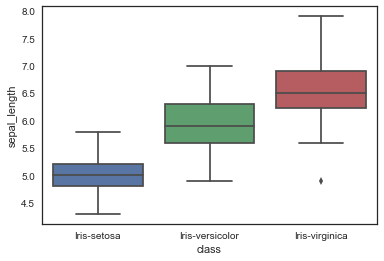

In [22]:
# sepal_length 
sns.boxplot(x="class", y="sepal_length", data=df)

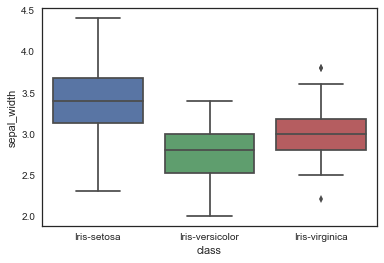

In [23]:
# sepal_width
sns.boxplot(x="class", y="sepal_width", data=df)

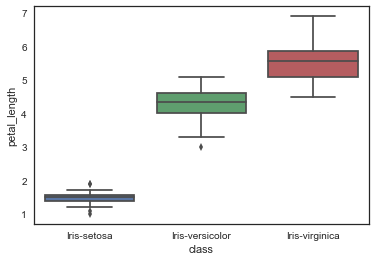

In [24]:
# petal_length
sns.boxplot(x="class", y="petal_length", data=df)

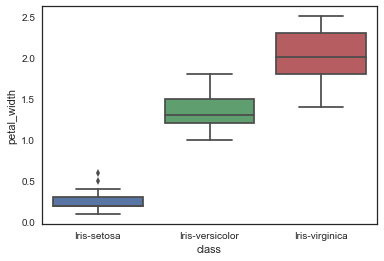

In [25]:
# petal_width
sns.boxplot(x="class", y="petal_width", data=df)

The Iris-setosas are conveniently have less(significantly) petal_width and petal_length.
I could use petal width and length to distinguish if iris is setosa or not.
  
    

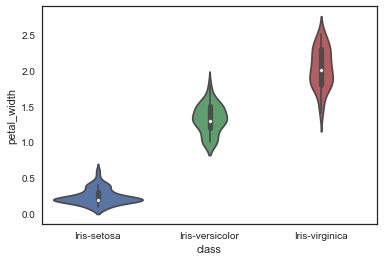

In [26]:
# want to look at the distribution as well.  Violin plot looks cool.

sns.violinplot(x="class", y="petal_width", data=df)

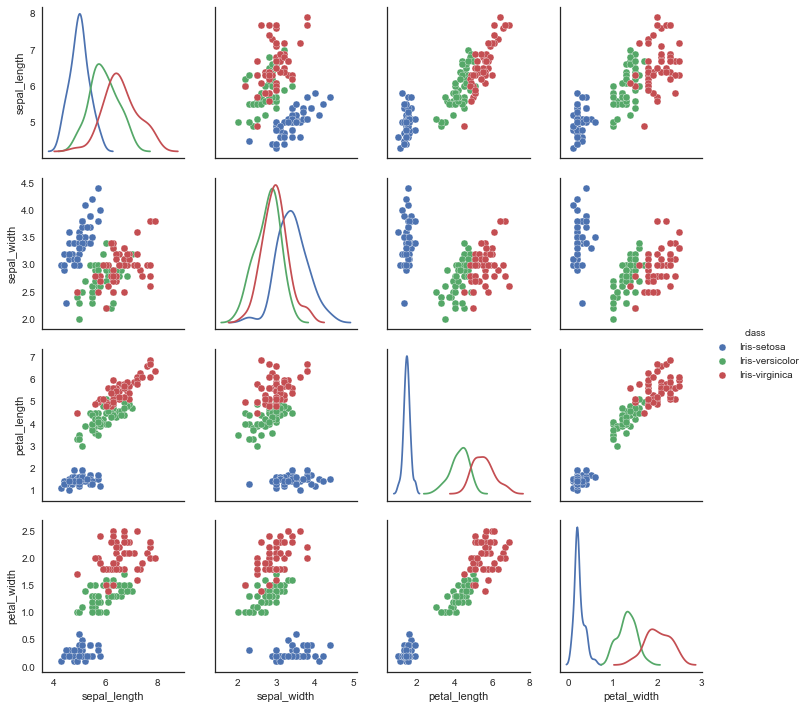

In [30]:
# Pair plot is always useful.  
sns.pairplot(df, hue="class", diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b52d890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a748d10>]], dtype=object)

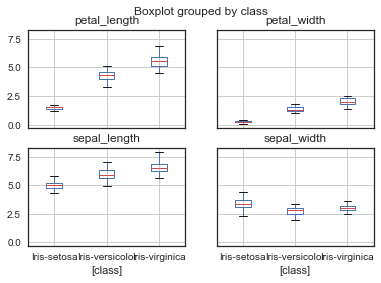

In [30]:
# more visualization
# I don't have to use sns.  I can just use pandas.  There are soo many visualization options available.

df.boxplot(by="class")

In [40]:
a = df.values
x = a[:, 0:4]
y = a[:, 4]

# We are holding out 20% of our dataset to be test
validation_size = 0.2
seed = 7

# variable X_ and Y_ is kinda hard to understand in a glance. 
# think about y = mx + b
# X_train is input which means they are variables used to predict the iris class in this case which are petal_length, width, sepa_length width etc. 
# Y_train is output which means they are the iris class.  Since they are train, they can be thought as "the answer"
# used to "train" our models. 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

# Next I want to test if I can use pandas df for x and y value. without turning them into arrays.

In [41]:
# Hey this works as well. 
# so you CAN put pandas df into x and y. 

# y = df["class"]
# x = df[["petal_length", "petal_width", "sepal_length", "sepal_width"]]
# 
# x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=validation_size, random_state=seed)

Now it's time to build models. 
At this point I don't know which model is the best to predict so I will try to use as many as possible.
I can do this because data is quite small.

- Logistic Regresssion(LR)
- Linear Discriminant Analysis(LDA)
- K-Nearest Neighbors (KNN)
- Classification and Regression Trees (CART)
- Gaussian Naive Bayes (NB)
- Support Vector Machines (SVM)



In [33]:
# import bunch of sklearn packages

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)


SVM: 0.991667 (0.025000)


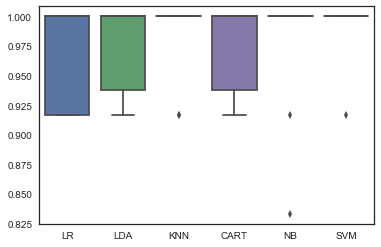

In [35]:
# way to score cross validation. 
scoring = "accuracy"
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print msg

sns.boxplot(names, results)

In [36]:
# For this example, it looks like SVM and KNN works the best. 
#

In [37]:
# Make predictions
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [38]:
svm = SVC(probability=True)
svm.fit(x_train, y_train)
pred = svm.predict(x_test)

print accuracy_score(y_test, pred)
print confusion_matrix(y_test, pred)
print classification_report(y_test, pred)

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



***

Review some terms from stat100

1. True positive: correctly identified
2. True negative: correctly rejected
3. False positive: incorrectly identified
4. False negative: incorrectly rejected

***

- True, False = Correct and Incorrect So Anything False is not good
- positive = identified
- negative = rejected

***

- Type I error occurs when incorrectly identified
- Type II error occurs when incorrectly rejected

Recall == Sensitivity == True Positive Rate(TPR) == tp/tp+fn

precision == positive predictive value == tp/tp+fp

F1 = 2 * precision * recall/(precision + recall) == measure of a test's accuracy



In [61]:
# These two functions can return the predict_probability. 


# print knn.predict_proba(x_test)
# print svm.predict_proba(x_test)
print df.describe()

# If I can make my own test and maybe you can let user to input the variables 

my_test = [[5.8, 3.0, 6.5, 1.5]]

set_test = [[5.8, 3.0, 1.0, 0.1]]
ver_test = [[5.8, 3.0, 3.0, 0.2]]
vir_test = [[5.8, 3.0, 6.5, 1.5]]


print knn.predict(set_test)
print knn.predict_proba(set_test)

print knn.predict(ver_test)
print knn.predict_proba(ver_test)

print knn.predict(vir_test)
print knn.predict_proba(vir_test)



       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
['Iris-setosa']
[[ 1.  0.  0.]]
['Iris-versicolor']
[[ 0.  1.  0.]]
['Iris-virginica']
[[ 0.  0.  1.]]


*** 

This is the End of the first iteration. 
